In [55]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import lag_plot, autocorrelation_plot
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import pandas as pd
import matplotlib.pyplot as plt


## Load and Clean Apple Stock Data


In [56]:
# ============== Load and Clean Data ==============
# Read CSV
df = pd.read_csv("../dataset/apple.csv")

# Rename columns
df.columns = ["Date", "Open", "High", "Low", "Close", "Volume"]

# Drop redundant header row if present
if df.iloc[0, 0] == "Date":
    df = df.iloc[1:].reset_index(drop=True)

# Convert numeric columns
numeric_cols = ["Open", "High", "Low", "Close", "Volume"]
df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors="coerce")

# Drop missing rows
df.dropna(inplace=True)

# Parse date
df["Date"] = pd.to_datetime(df["Date"])


# PLOTS

## Time Series Plot (All Features)

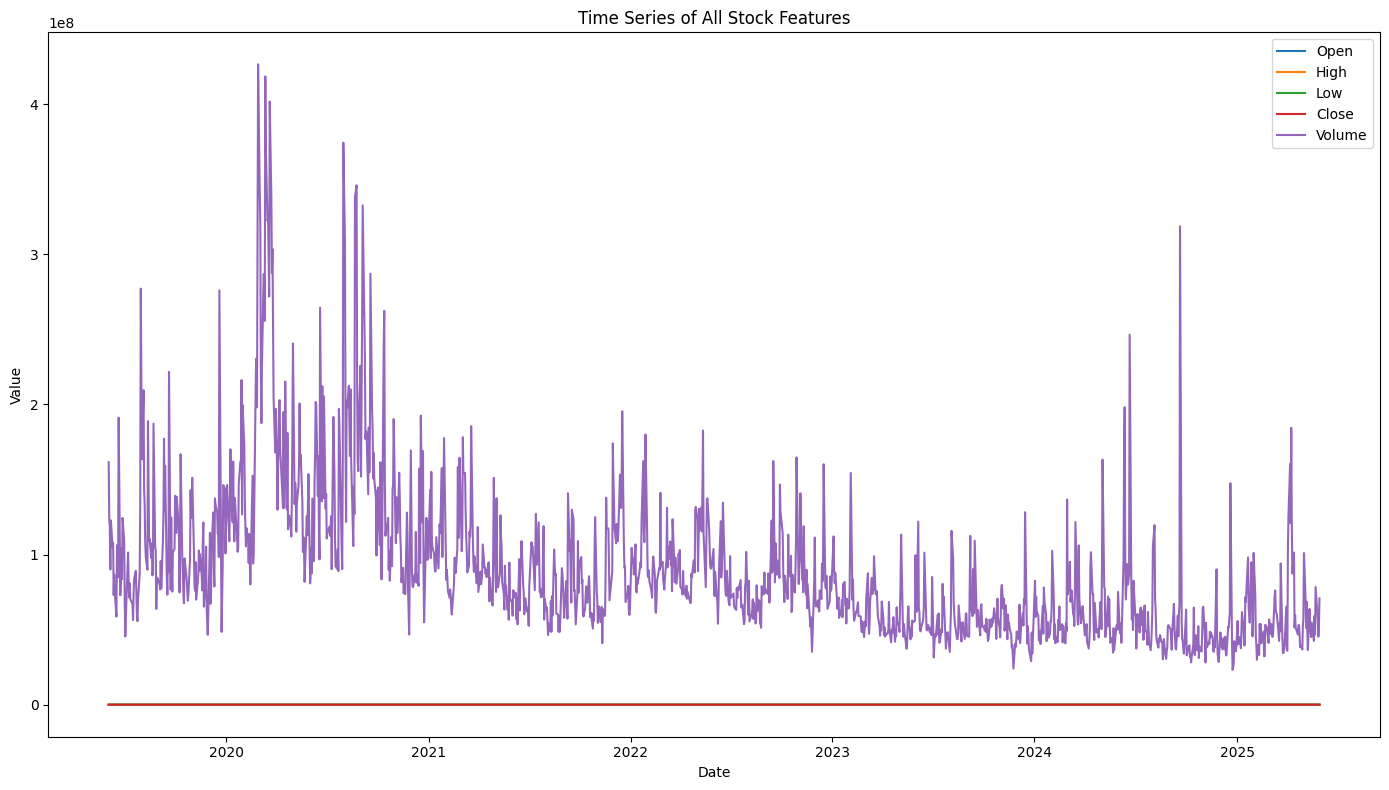

In [57]:
plt.figure(figsize=(14, 8))
for col in numeric_cols:
    plt.plot(df["Date"], df[col], label=col)
plt.title("Time Series of All Stock Features")
plt.xlabel("Date")
plt.ylabel("Value")
plt.legend()
plt.tight_layout()
plt.show()
plt.close()


# Time Series Plot (Close Price)

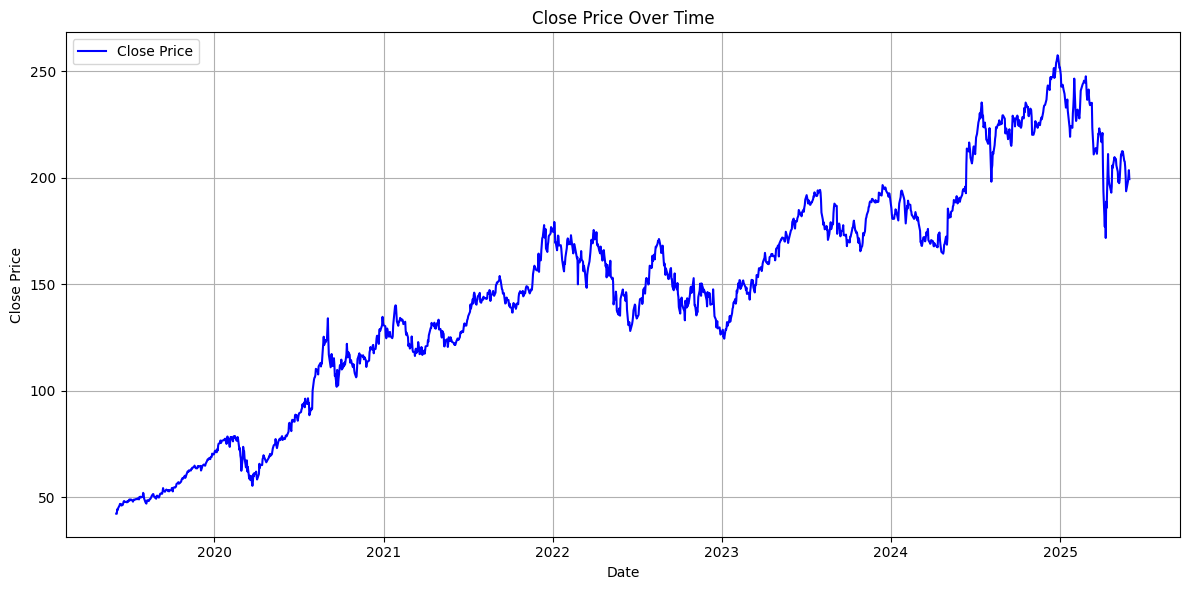

In [58]:
plt.figure(figsize=(12, 6))
plt.plot(df["Date"], df["Close"], label="Close Price", color="blue")
plt.title("Close Price Over Time")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()
plt.close()


# Histograms

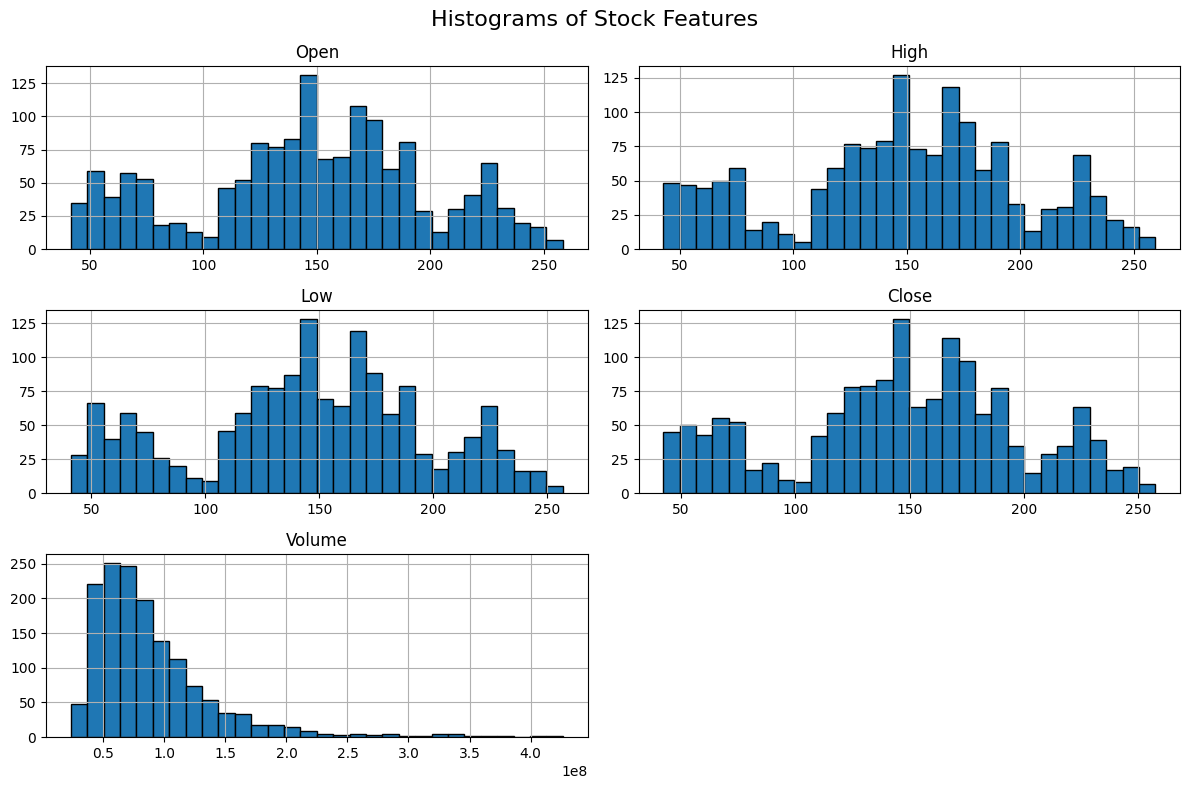

In [59]:

df[numeric_cols].hist(figsize=(12, 8), bins=30, edgecolor='black')
plt.suptitle("Histograms of Stock Features", fontsize=16)
plt.tight_layout()
plt.show()
plt.close()


# Boxplots (Prices only)

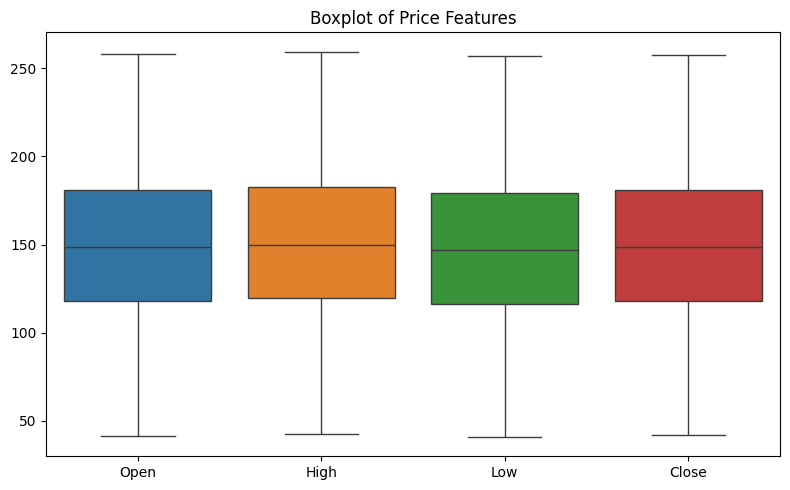

In [60]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=df[["Open", "High", "Low", "Close"]])
plt.title("Boxplot of Price Features")
plt.tight_layout()
plt.show()
plt.close()


# Boxplot (Volume)

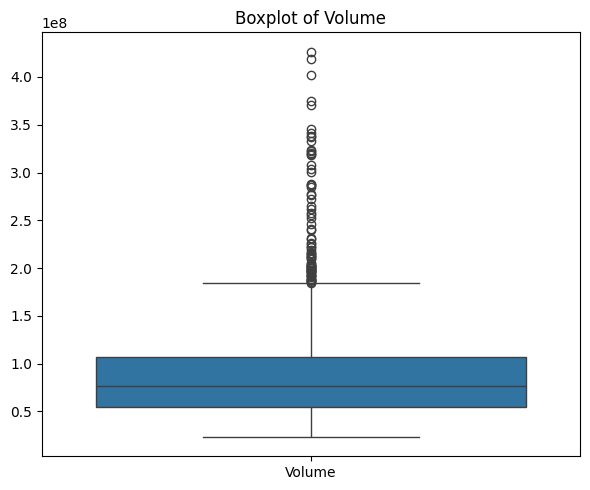

In [61]:
plt.figure(figsize=(6, 5))
sns.boxplot(data=df[["Volume"]])
plt.title("Boxplot of Volume")
plt.tight_layout()
plt.show()
plt.close()


# Violin Plots (Prices)

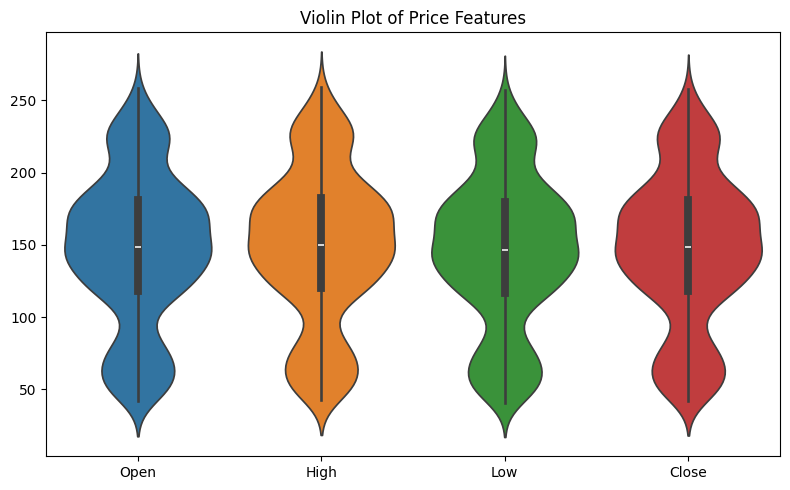

In [62]:
plt.figure(figsize=(8, 5))
sns.violinplot(data=df[["Open", "High", "Low", "Close"]])
plt.title("Violin Plot of Price Features")
plt.tight_layout()
plt.show()
plt.close()



# Violin Plot (Volume)

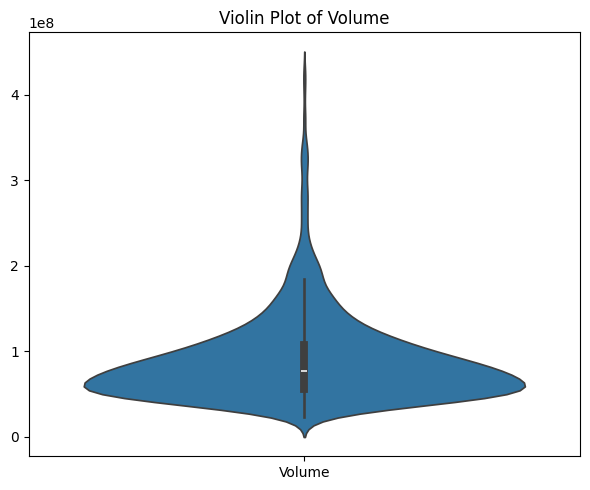

In [63]:
plt.figure(figsize=(6, 5))
sns.violinplot(data=df[["Volume"]])
plt.title("Violin Plot of Volume")
plt.tight_layout()
plt.show()
plt.close()



# Scaled Violin Plot

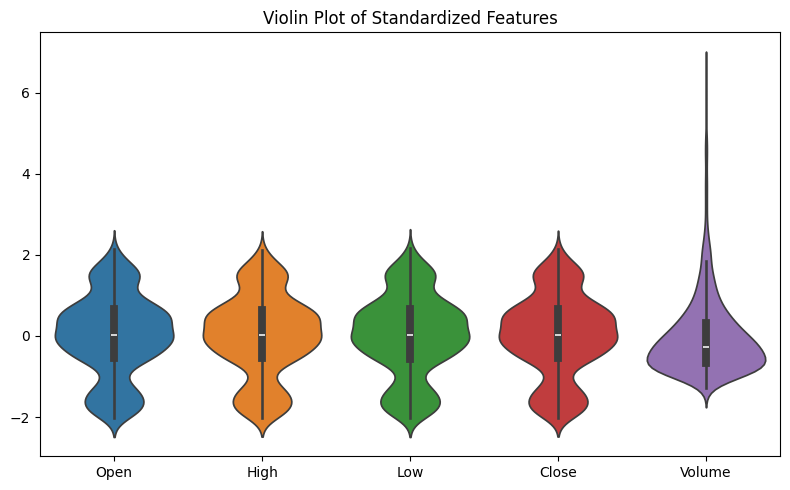

In [64]:
scaler = StandardScaler()
scaled_data = pd.DataFrame(
    scaler.fit_transform(df[numeric_cols]),
    columns=numeric_cols
)

plt.figure(figsize=(8, 5))
sns.violinplot(data=scaled_data)
plt.title("Violin Plot of Standardized Features")
plt.tight_layout()
plt.show()
plt.close()


# KDE Plots

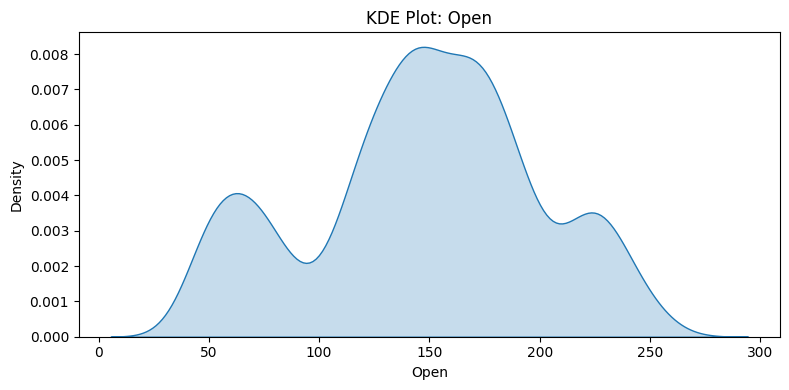

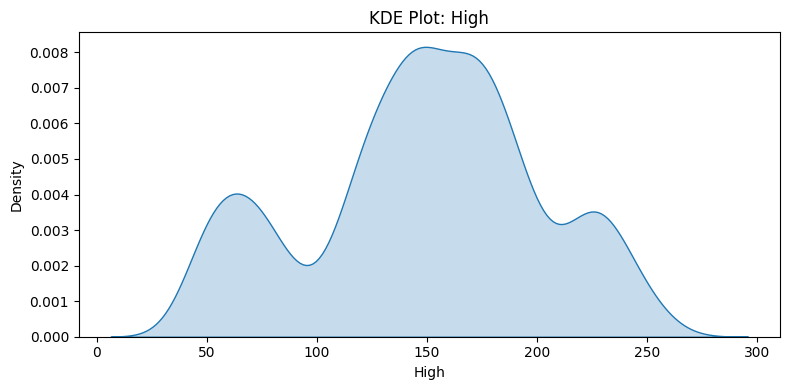

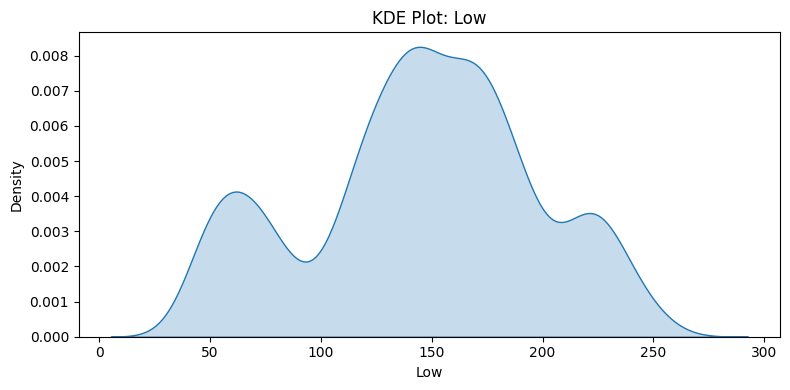

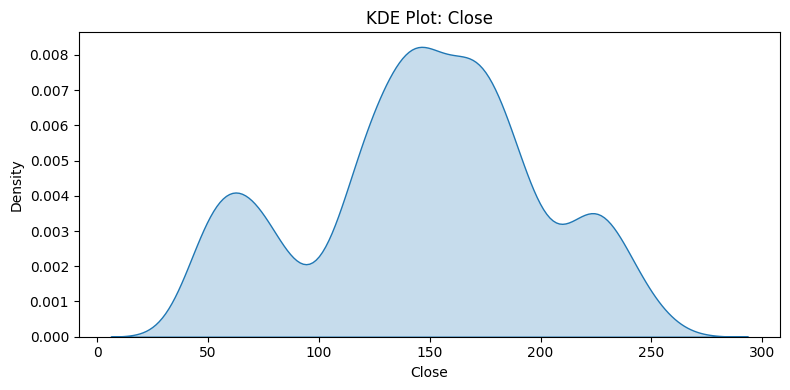

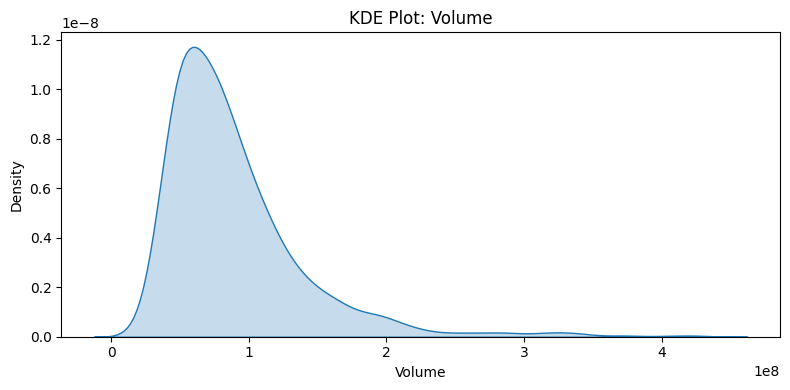

In [65]:
for col in numeric_cols:
    plt.figure(figsize=(8, 4))
    sns.kdeplot(df[col], fill=True)
    plt.title(f"KDE Plot: {col}")
    plt.tight_layout()
    plt.show()
    plt.close()


# Correlation Heatmap

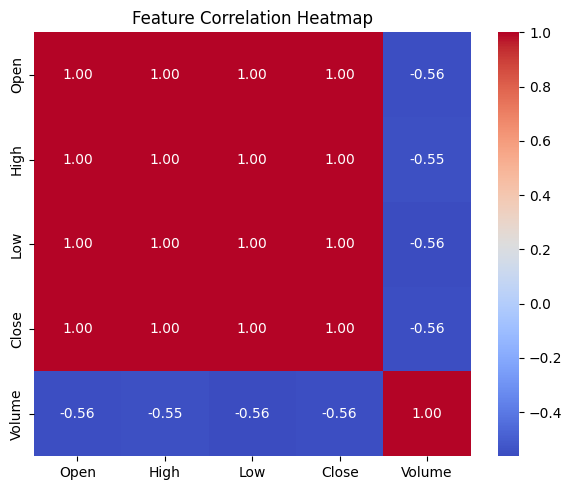

In [66]:
plt.figure(figsize=(6, 5))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.tight_layout()
plt.show()
plt.close()


# Pairplot

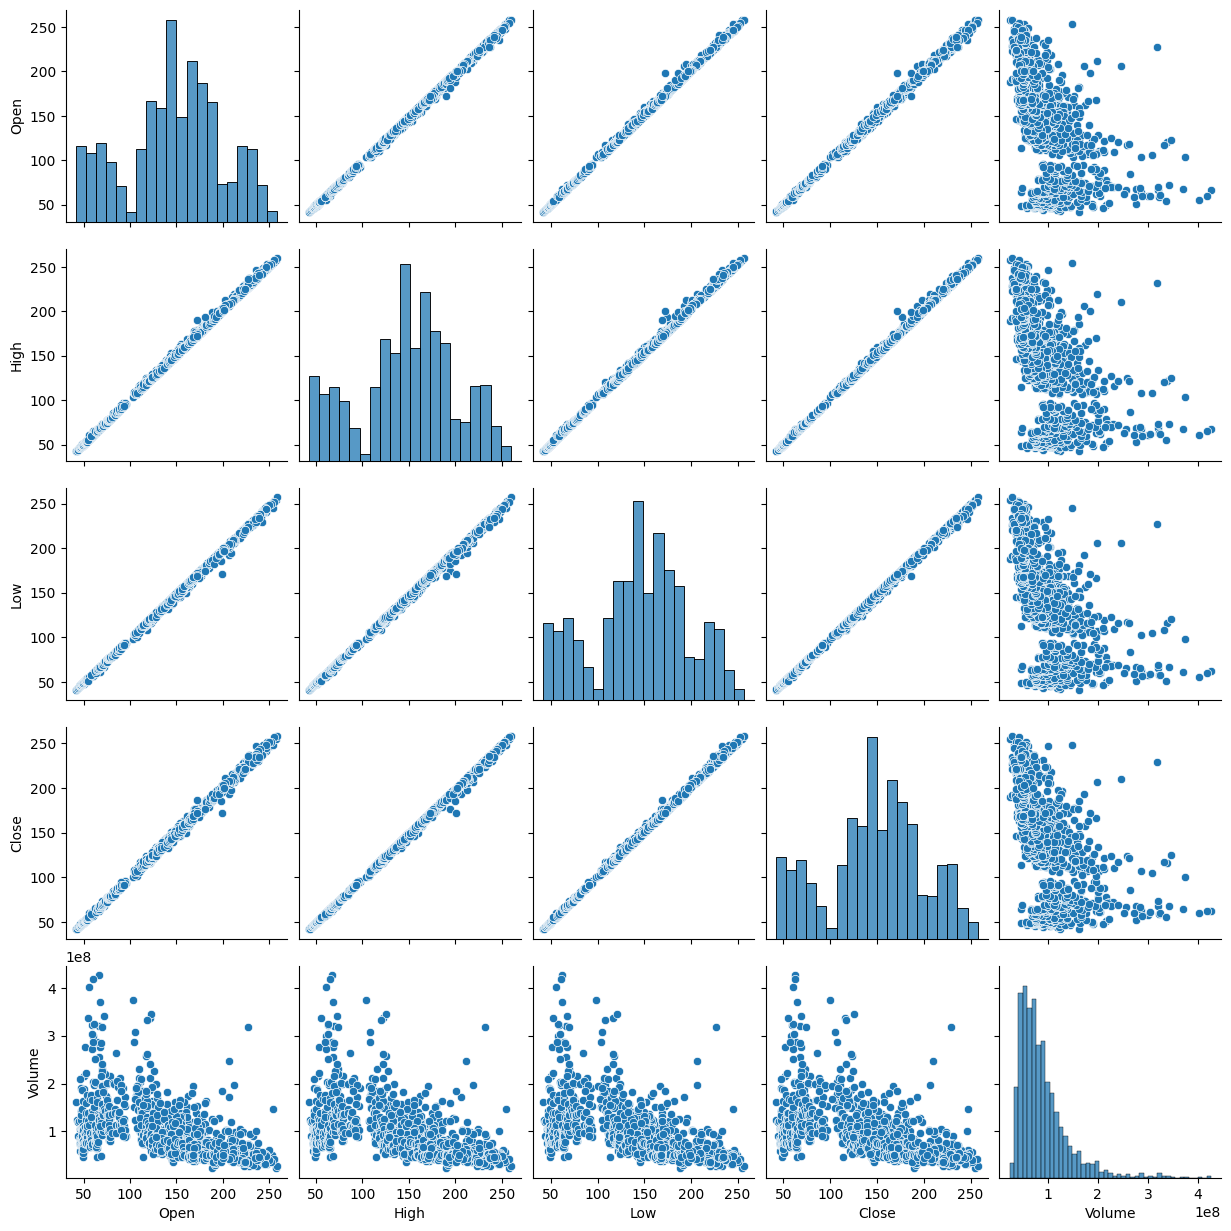

In [67]:

sns.pairplot(df[numeric_cols])
plt.show()
plt.close()


# Scatter Plot: Volume vs Close

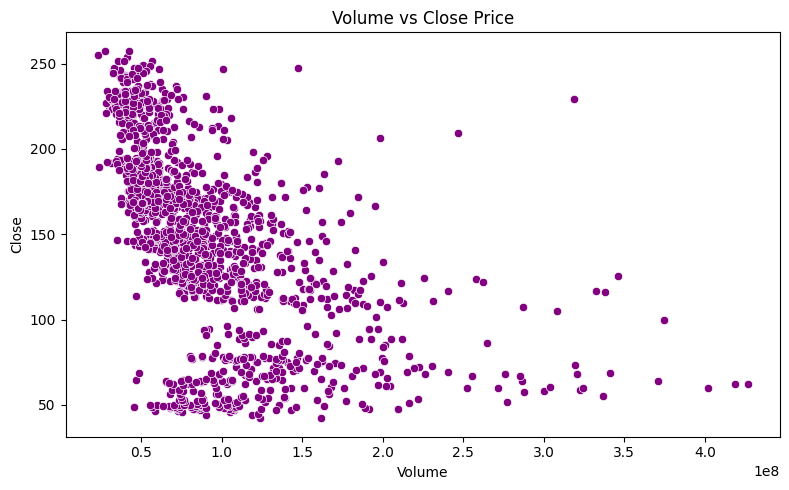

In [68]:

plt.figure(figsize=(8, 5))
sns.scatterplot(x="Volume", y="Close", data=df, color="purple")
plt.title("Volume vs Close Price")
plt.tight_layout()
plt.show()
plt.close()

# Moving Averages

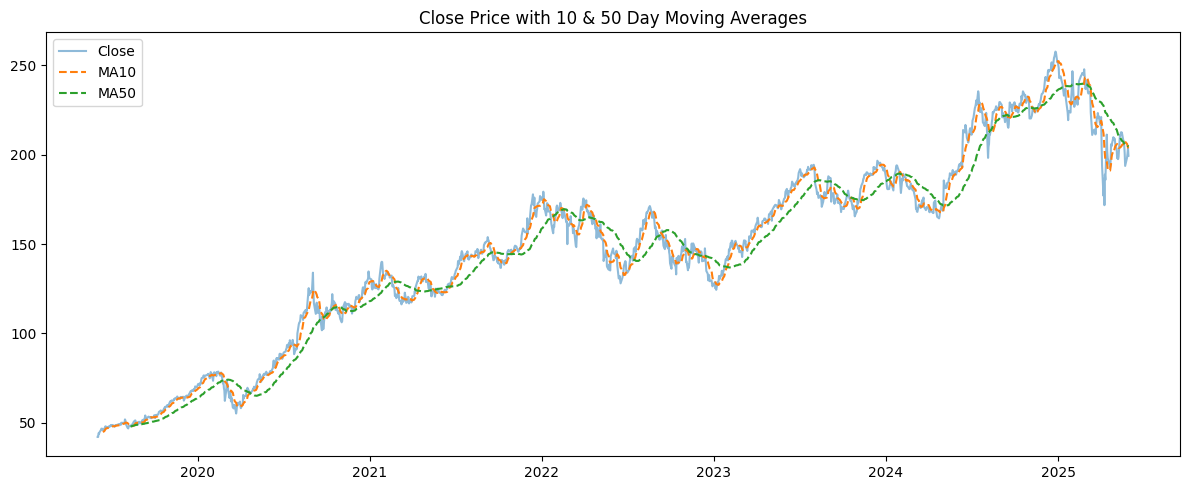

In [69]:
df["MA10"] = df["Close"].rolling(10).mean()
df["MA50"] = df["Close"].rolling(50).mean()

plt.figure(figsize=(12, 5))
plt.plot(df["Date"], df["Close"], label="Close", alpha=0.5)
plt.plot(df["Date"], df["MA10"], label="MA10", linestyle="--")
plt.plot(df["Date"], df["MA50"], label="MA50", linestyle="--")
plt.legend()
plt.title("Close Price with 10 & 50 Day Moving Averages")
plt.tight_layout()
plt.show()
plt.close()


# Lag Plot

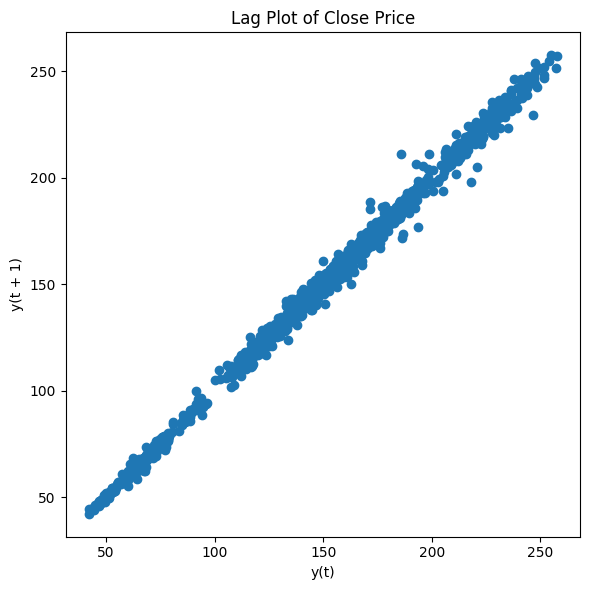

In [70]:

plt.figure(figsize=(6, 6))
lag_plot(df["Close"])
plt.title("Lag Plot of Close Price")
plt.tight_layout()
plt.show()
plt.close()


# Autocorrelation Plot

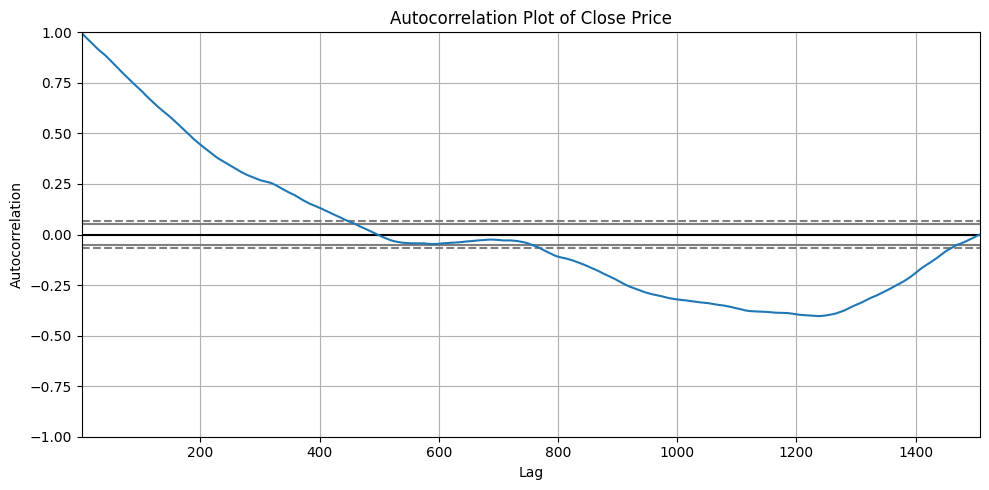

In [71]:
plt.figure(figsize=(10, 5))
autocorrelation_plot(df["Close"])
plt.title("Autocorrelation Plot of Close Price")
plt.tight_layout()
plt.show()
plt.close()



#  BAR CHARTS 

## Plot Average Values of Stock Features


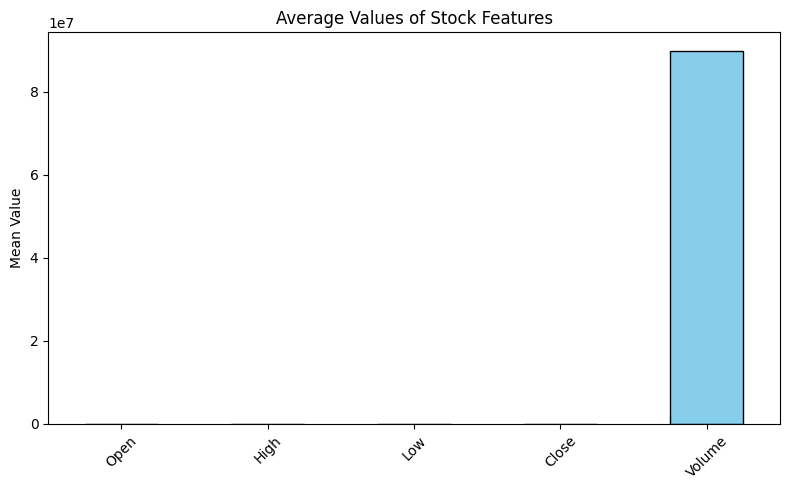

In [72]:
mean_values = df[numeric_cols].mean()

plt.figure(figsize=(8, 5))
mean_values.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title("Average Values of Stock Features")
plt.ylabel("Mean Value")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
plt.close()


## Plot Total Trading Volume by Year

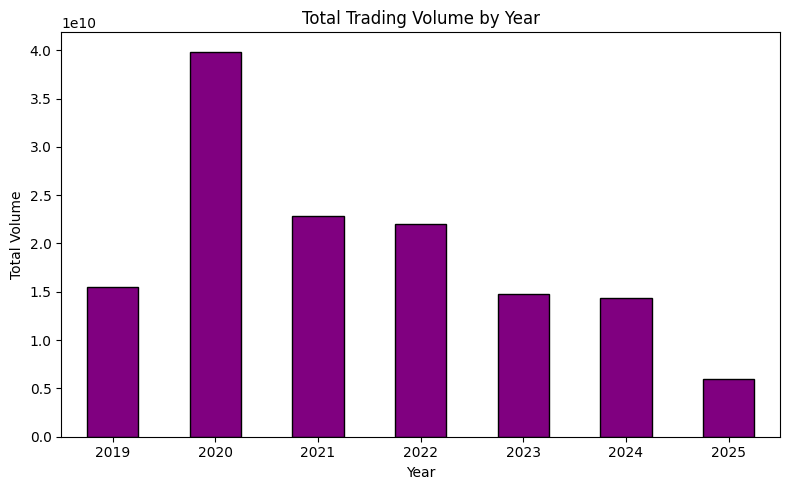

In [73]:
df["Year"] = df["Date"].dt.year
volume_by_year = df.groupby("Year")["Volume"].sum()

plt.figure(figsize=(8, 5))
volume_by_year.plot(kind='bar', color='purple', edgecolor='black')
plt.title("Total Trading Volume by Year")
plt.ylabel("Total Volume")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()
plt.close()



## Visualize Days with Gains vs Losses


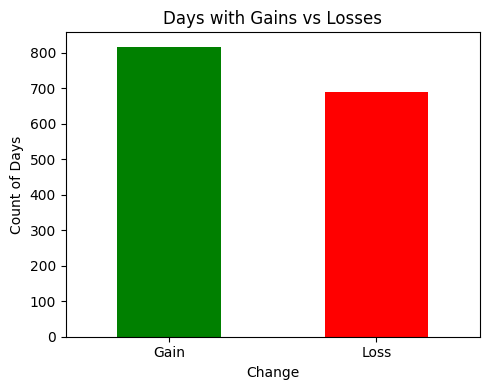

In [74]:
df["Change"] = df["Close"].diff()
gain_loss_counts = df["Change"].apply(lambda x: "Gain" if x > 0 else "Loss").value_counts()

plt.figure(figsize=(5, 4))
gain_loss_counts.plot(kind='bar', color=['green', 'red'])
plt.title("Days with Gains vs Losses")
plt.ylabel("Count of Days")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()
plt.close()



## Correlation Analysis with Close Price


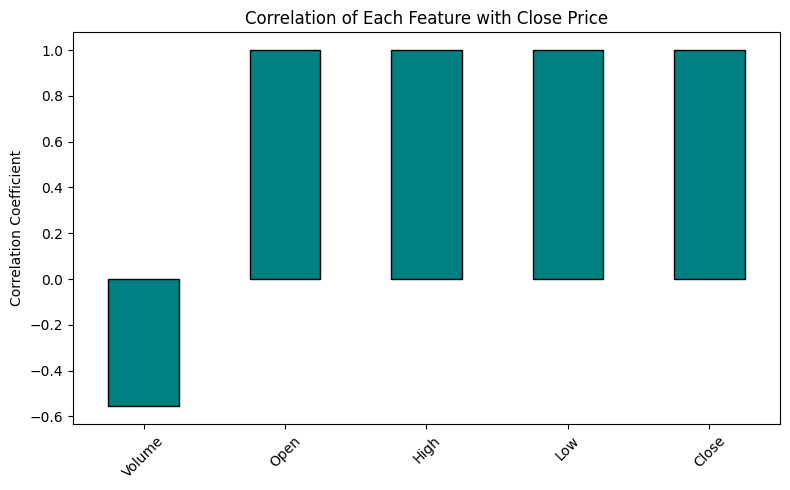

In [75]:
corr_with_close = df[numeric_cols].corr()["Close"].sort_values()

plt.figure(figsize=(8, 5))
corr_with_close.plot(kind='bar', color='teal', edgecolor='black')
plt.title("Correlation of Each Feature with Close Price")
plt.ylabel("Correlation Coefficient")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
plt.close()



## Visualize Train/Test Split


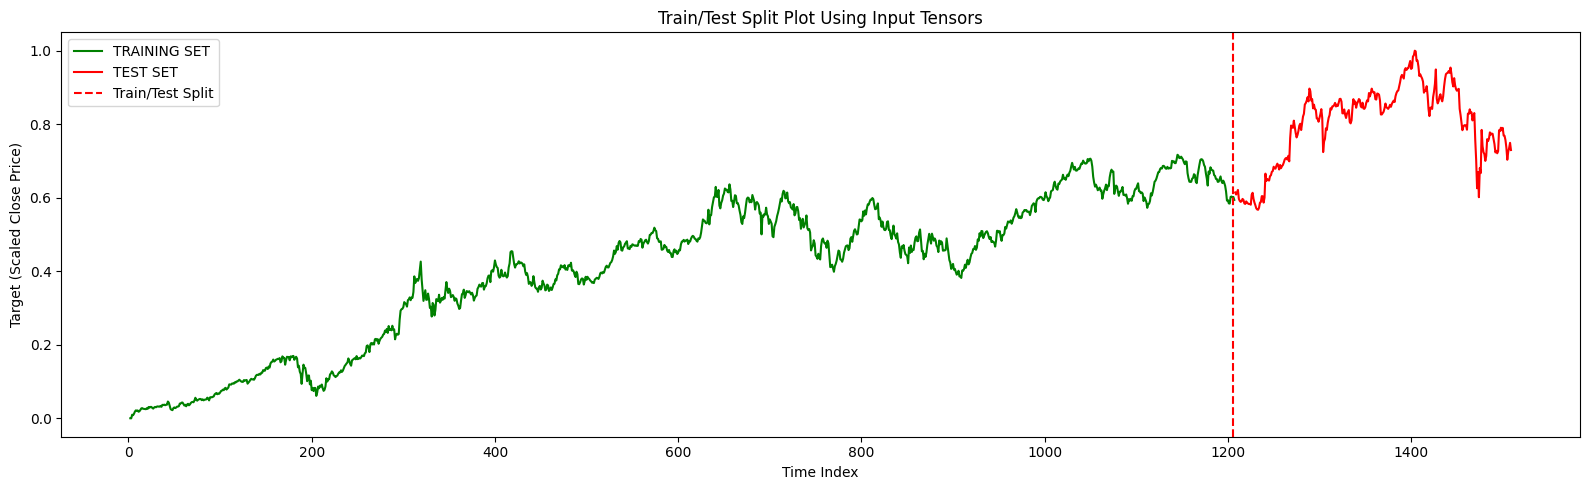

In [76]:
split_idx = int(len(df) * 0.8)
train = df.iloc[:split_idx]
test = df.iloc[split_idx:]

# Scale Close price for visualization
scaler = MinMaxScaler()
scaled_close = scaler.fit_transform(df["Close"].values.reshape(-1, 1))

plt.figure(figsize=(16, 5))
plt.plot(
    df.index[:split_idx],
    scaled_close[:split_idx],
    label="TRAINING SET",
    color="Green",
)
plt.plot(
    df.index[split_idx:],
    scaled_close[split_idx:],
    label="TEST SET",
    color="red",
)
plt.axvline(split_idx, color="red", linestyle="--", label="Train/Test Split")
plt.title("Train/Test Split Plot Using Input Tensors")
plt.xlabel("Time Index")
plt.ylabel("Target (Scaled Close Price)")
plt.legend()
plt.tight_layout()
plt.show()
plt.close()



#  Quarterly OHLC Plot (Linear Scale) 

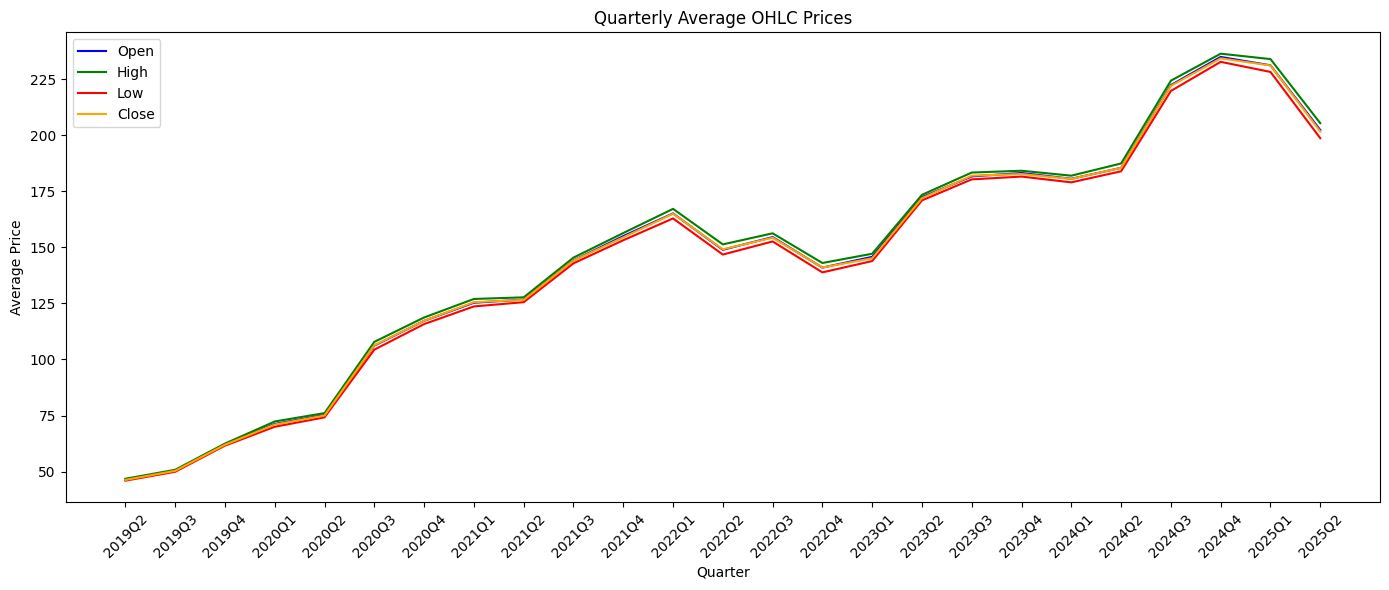

In [77]:
df["Quarter"] = df["Date"].dt.to_period("Q")
quarterly_avg = df.groupby("Quarter")[["Open", "High", "Low", "Close"]].mean()

plt.figure(figsize=(14, 6))
for col, color in zip(["Open", "High", "Low", "Close"], ["blue", "green", "red", "orange"]):
    plt.plot(quarterly_avg.index.astype(str), quarterly_avg[col], label=col, color=color)

plt.xlabel("Quarter")
plt.ylabel("Average Price")
plt.title("Quarterly Average OHLC Prices")
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

## Visualize Train, Validation, and Test Splits


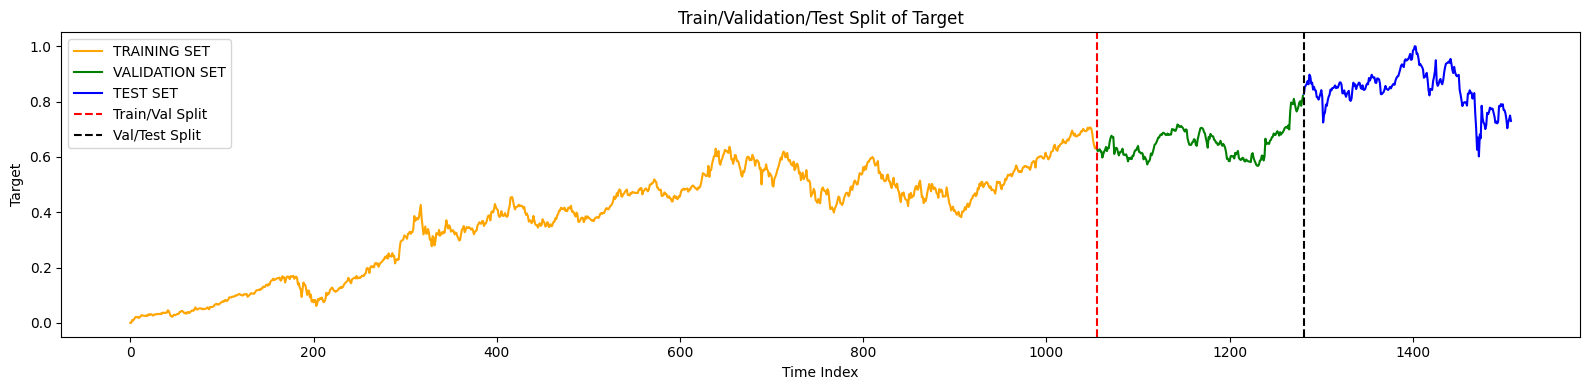

In [78]:
# Use Close price as target
target = df["Close"].values.reshape(-1, 1)

# Scale Close price
scaler = MinMaxScaler()
scaled_target = scaler.fit_transform(target)

# ====== Split Indexes ======
n = len(scaled_target)
train_end = int(n * 0.7)
val_end = int(n * 0.85)

# ====== Plot ======
plt.figure(figsize=(16, 4))
# Plot train
plt.plot(range(train_end), scaled_target[:train_end], label="TRAINING SET", color="orange")
# Plot val
plt.plot(range(train_end, val_end), scaled_target[train_end:val_end], label="VALIDATION SET", color="green")
# Plot test
plt.plot(range(val_end, n), scaled_target[val_end:], label="TEST SET", color="blue")
# Vertical lines
plt.axvline(train_end, color="red", linestyle="--", label="Train/Val Split")
plt.axvline(val_end, color="black", linestyle="--", label="Val/Test Split")

plt.title("Train/Validation/Test Split of Target")
plt.xlabel("Time Index")
plt.ylabel("Target")
plt.legend()
plt.tight_layout()
plt.show()